In [17]:
# !pip install vaderSentiment
# !pip install tabulate
# !pip install textblob
!pip install pandas --upgrade

Requirement not upgraded as not directly required: numpy>=1.12.0 in c:\users\dan\anaconda3\lib\site-packages (from pandas) (1.14.3)
Requirement not upgraded as not directly required: pytz>=2011k in c:\users\dan\anaconda3\lib\site-packages (from pandas) (2018.4)
Requirement not upgraded as not directly required: python-dateutil>=2.5.0 in c:\users\dan\anaconda3\lib\site-packages (from pandas) (2.7.3)
Requirement not upgraded as not directly required: six>=1.5 in c:\users\dan\anaconda3\lib\site-packages (from python-dateutil>=2.5.0->pandas) (1.11.0)
  Found existing installation: pandas 0.23.0
    Uninstalling pandas-0.23.0:
      Successfully uninstalled pandas-0.23.0


distributed 1.21.8 requires msgpack, which is not installed.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Dan\\AppData\\Local\\Temp\\pip-uninstall-5knmz14m\\users\\dan\\anaconda3\\lib\\site-packages\\pandas\\io\\msgpack\\_packer.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import warnings
import textblob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import *
from doc_utils import *
from tabulate import tabulate
from collections import Counter
from sklearn.ensemble import ExtraTreesClassifier
from nlp_utils import get_features, make_predictions
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.metrics import precision_score, recall_score, f1_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
df

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,userfollowers_count,userfriends_count,userlisted_count,userfavourites_count,userverified,userstatuses_count,userfollowing,userfollow_request_sent,usercontributors_enabled,extracted_location
0,None,None,Wed Apr 03 04:24:07 +0000 2019,"[16, 215]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,"@AudreyTruschke I THINK HE LOST HID MEMORY,, H...",None,...,84,695,0,97,False,529,None,None,False,"india,gujarat"
1,None,None,Wed Apr 03 05:17:12 +0000 2019,"[0, 224]","{'hashtags': [{'text': 'ElectionCommission', '...","{'media': [{'id': 1113309107711238146, 'id_str...",1,False,Pro-democracy activist Siriwith Serithiwat col...,None,...,918,186,49,60,False,13317,None,None,False,bangkok
2,None,None,Wed Apr 03 05:02:38 +0000 2019,"[0, 201]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,3,False,"Soon, narendramodi will address a massive rall...",None,...,8510,1813,85,18033,False,143183,None,None,False,arunachal
3,None,None,Wed Apr 03 05:04:36 +0000 2019,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1113306122855702529, 'id_str...",51,False,Prime Minister Narendra Modi to address a publ...,None,...,6740368,126,6848,3005,True,569473,None,None,False,arunachal
4,None,None,Wed Apr 03 04:15:34 +0000 2019,"[0, 121]","{'hashtags': [{'text': 'Bengaluru', 'indices':...",NaN,16,False,"ತೊಟ್ಟಿಲು ತೂಗಿ, ಸಿಎಂ ಪದವಿಗೆ ಮೊರೆ ಹೋದ್ರಾ ಡಿಕೆಶಿ?...",None,...,103631,904,326,3,True,100375,None,None,False,bengaluru
5,None,None,Wed Apr 03 04:12:45 +0000 2019,"[0, 187]","{'hashtags': [{'text': 'May23WithArnab', 'indi...",NaN,43,False,Shocking remark by former J&amp;K CM Farooq Ab...,None,...,595384,3,1156,0,True,164340,None,None,False,
6,None,None,Wed Apr 03 04:44:37 +0000 2019,"[0, 185]","{'hashtags': [{'text': 'ModiAgain2019', 'indic...",NaN,2,False,Massive turnout in Shri @AmitShah yesterday's ...,None,...,107,961,0,1942,False,4229,None,None,False,coimbatore
7,None,None,Wed Apr 03 05:15:40 +0000 2019,"[0, 207]",{'hashtags': [{'text': 'LokSabhaElections2019'...,"{'media': [{'id': 1113308916803178497, 'id_str...",5,False,#LokSabhaElections2019 | Prime Minister Naren...,None,...,108898,160,761,13,True,77474,None,None,False,arunachal
8,None,None,Wed Apr 03 04:09:21 +0000 2019,"[0, 101]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,"चुनावी घोषणा पत्र से राष्ट्रवाद, कश्मीर विषय प...",None,...,5620,20,283,108,False,83956,None,None,False,
9,None,None,Wed Apr 03 05:15:50 +0000 2019,"[0, 279]","{'hashtags': [{'text': 'CongressManifesto', 'i...",NaN,5,False,When the BJP talks about doing away with AFSPA...,None,...,42456,22322,52,1168,False,96085,None,None,False,"india,jammu"


In [5]:
plt.rcParams['figure.figsize'] = [20, 8]

# Read tweets csv
df = pd.concat([pd.read_csv("../../data/Tweets3WeeksLocations.csv"), pd.read_pickle("../../data/Tweets3Weeks_2Locations.pkl")]) 
# Drop all-null rows if any
df.dropna(how='all', inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

C:\Users\Dan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (18,27,29,31,40,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Dan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [7]:
df['finallocation']

0                  Hyderabad
1                      India
2                    Kolkata
3                    Kolkata
4                    Kolkata
5                  Bengaluru
6                    Kolkata
7                    Kolkata
8                    Kolkata
9                    Kolkata
10                   Kolkata
11                   Kolkata
12                     India
13                 Bengaluru
14           Delhi-New Delhi
15                   Lucknow
16                   Kolkata
17                     India
18           Delhi-New Delhi
19        Thiruvananthapuram
20                   Kolkata
21                   Kolkata
22                     India
23                   Kolkata
24                     India
25                   Kolkata
26                 Ahmedabad
27                     India
28                   Kolkata
29                   Kolkata
                 ...        
236838                   NaN
236839                   NaN
236840                   NaN
236841        

In [18]:
lead_days = 2
days_window = 5

start_date = pd.to_datetime("23-feb-2019")
end_date = pd.to_datetime("15-apr-2019")


labels = process_acled_csv("../../data/1900-01-01-2019-04-15-India.csv", 
                           top_locations=-1, 
                           start=start_date, 
                           end=end_date,
                           lead_days=lead_days,
                           days_window = days_window)

Data from 2019-02-23 to 2019-04-15  & Number of days - 52


In [20]:
clean = False
if not clean:
    df = clean_df(df)
    clean = True

Dropping 1 rows!


In [21]:
df.head(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extractedlocation,favorite_count,favorited,finallocation,...,userfollowers_count,userfollowing,userfriends_count,userlisted_count,userlocation,username,userscreen_name,userstatuses_count,userverified,withheld_in_countries
0,NaN,NaN,Tue Mar 05 04:05:13 +0000 2019,"[26, 264]","{'hashtags': [{'text': 'Telangana', 'indices':...",NaN,"india, telangana",3.0,False,Hyderabad,...,2175.0,NaN,1378.0,22.0,Hyderabad,Anusha Puppala,anusha_puppala,4178.0,False,NaN
1,NaN,NaN,Tue Mar 05 04:05:13 +0000 2019,"[26, 264]","{'hashtags': [{'text': 'Telangana', 'indices':...",NaN,"india, telangana",3.0,False,India,...,2175.0,NaN,1378.0,22.0,Hyderabad,Anusha Puppala,anusha_puppala,4178.0,False,NaN
2,NaN,NaN,Mon Mar 04 14:20:40 +0000 2019,"[0, 277]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1102574234897924096, 'id_str...",west bengal,3.0,False,Kolkata,...,2936.0,NaN,1540.0,9.0,Ahmedabad,Shalav Majmudar,iShalavbjp,32019.0,False,NaN
3,NaN,NaN,Mon Mar 04 17:56:29 +0000 2019,"[0, 264]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1102628641668763650, 'id_str...","kolkata, west bengal",2.0,False,Kolkata,...,4361.0,NaN,4.0,35.0,"New Delhi, India",ElectionAdda (INDIA),electionaddaEN,17589.0,False,NaN
4,NaN,NaN,Mon Mar 04 06:42:10 +0000 2019,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,west bengal,0.0,False,Kolkata,...,85.0,NaN,747.0,2.0,NaN,Navaneethkrishnan,navaneethkrish2,10009.0,False,NaN


In [22]:
df = get_tweet_sentiment(df)

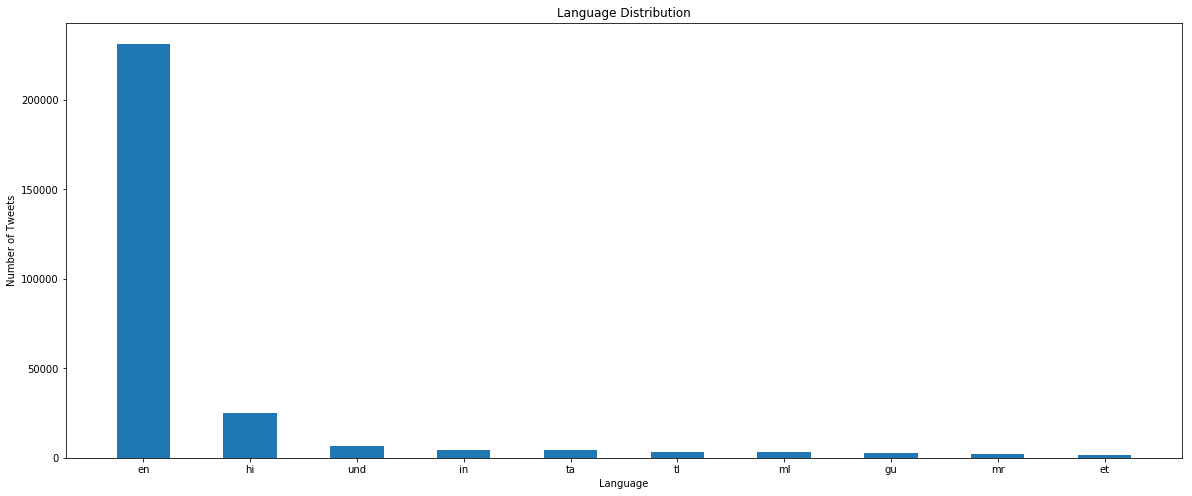

In [23]:
plot_counter(df['lang'], num_elements=10, xlabel="Language", ylabel="Number of Tweets", title="Language Distribution")

In [24]:
df['created_at'] = pd.to_datetime(df['created_at'])
# Sort by time created
df.sort_values(by=['created_at'], inplace=True)

In [25]:
print(start_date, end_date)

warnings.filterwarnings('ignore')
location_date_dict = interleave_location_and_date(df, start_date, end_date)
warnings.filterwarnings('default')

2019-02-23 00:00:00 2019-04-15 00:00:00


### Current Features
   * Number of tweets each day
   * Average pos, neg, neu and compound features
   * Tweet count with neg sentiment

### TODO
   * Hate speech
   * Violent speech

In [26]:
location_features_dict = {}
for location in location_date_dict:
    location_features_dict[location] = get_features(location_date_dict[location])
    print(location, "done")

Sangrur done
Patiala done
Jalandhar done
Amritsar done
Ludhiana done
Chandigarh done
Bathinda done
Bengaluru done
Delhi-New Delhi done
India done
Karnal done
Gurgaon done
Thiruvananthapuram done
Dehradun done
Lucknow done
Pulwama done
Hyderabad done
Kolkata done
Ahmedabad done
Guwahati done
Chennai done
Salem done
Tiruchirappalli done
Coimbatore done
Madurai done
Puducherry done
Agartala done
Imphal done
Jammu done
Ranchi done
Shimla done
Patna done
Jaipur done
Srinagar done
nan done


In [38]:
make_predictions(location_features_dict, labels)

|      Location      |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |   % of +'s in data |
|:------------------:|-----------------:|----------------:|------------:|---------:|-----------:|-------------------:|
|      Agartala      |             0.97 |            0.5  |        0.5  |     1    |       0.67 |              71.11 |
|     Ahmedabad      |             0.91 |            0.83 |        0    |     0    |       0    |              42.22 |
|      Amritsar      |             1    |            0.58 |        0.58 |     1    |       0.74 |              88.89 |
|      Bathinda      |             1    |            0.17 |        0.17 |     1    |       0.29 |              77.78 |
|     Bengaluru      |             1    |            0.5  |        0.5  |     1    |       0.67 |              77.78 |
|     Chandigarh     |             1    |            0.08 |        0.08 |     1    |       0.15 |              73.33 |
|      Chennai       |             1    |       